In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn_extra.cluster import KMedoids
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score

df = pd.read_csv('churn.txt', delimiter = ",")

In [2]:
df.isna().any()

State             False
Account Length    False
Area Code         False
Phone             False
Int'l Plan        False
VMail Plan        False
VMail Message     False
Day Mins          False
Day Calls         False
Day Charge        False
Eve Mins          False
Eve Calls         False
Eve Charge        False
Night Mins        False
Night Calls       False
Night Charge      False
Intl Mins         False
Intl Calls        False
Intl Charge       False
CustServ Calls    False
Churn?            False
dtype: bool

In [3]:
# Checking class balance
df['Churn?'].value_counts()


False.    2850
True.      483
Name: Churn?, dtype: int64

In [4]:
df

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


In [5]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

df[["State","Int'l Plan","VMail Plan","Churn?"]] = enc.fit_transform(df[["State","Int'l Plan","VMail Plan","Churn?"]])

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df = df[["State","Int'l Plan","VMail Plan","Area Code","VMail Message","Int'l Plan","VMail Plan","Day Mins","Day Calls","Eve Mins","Eve Calls","Night Mins","Night Calls","Intl Mins","Intl Calls","CustServ Calls"]]
#X[["Int'l Plan","VMail Plan","Day Mins","Day Calls","Eve Mins","Eve Calls","Night Mins","Night Calls","Intl Mins","Intl Calls"]] = sc.fit_transform(X[["Int'l Plan","VMail Plan","Day Mins","Day Calls","Eve Mins","Eve Calls","Night Mins","Night Calls","Intl Mins","Intl Calls"]])


In [7]:
df

,State,Int'l Plan,VMail Plan,Area Code,VMail Message,Int'l Plan,VMail Plan,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls
0,16.0,0.0,1.0,415,25,0.0,1.0,265.1,110,197.4,99,244.7,91,10.0,3,1
1,35.0,0.0,1.0,415,26,0.0,1.0,161.6,123,195.5,103,254.4,103,13.7,3,1
2,31.0,0.0,0.0,415,0,0.0,0.0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,35.0,1.0,0.0,408,0,1.0,0.0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,36.0,1.0,0.0,415,0,1.0,0.0,166.7,113,148.3,122,186.9,121,10.1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3.0,0.0,1.0,415,36,0.0,1.0,156.2,77,215.5,126,279.1,83,9.9,6,2
3329,49.0,0.0,0.0,415,0,0.0,0.0,231.1,57,153.4,55,191.3,123,9.6,4,3
3330,39.0,0.0,0.0,510,0,0.0,0.0,180.8,109,288.8,58,191.9,91,14.1,6,2
3331,6.0,1.0,0.0,510,0,1.0,0.0,213.8,105,159.6,84,139.2,137,5.0,10,2


In [11]:
sc = StandardScaler()
x_scaled = sc.fit_transform(df)

Clusters = 2: Silhouette = 0.218
Clusters = 3: Silhouette = 0.237
Clusters = 4: Silhouette = 0.15
Clusters = 5: Silhouette = 0.12
Clusters = 6: Silhouette = 0.126
Clusters = 7: Silhouette = 0.11
Clusters = 8: Silhouette = 0.1
Clusters = 9: Silhouette = 0.087
Clusters = 10: Silhouette = 0.097


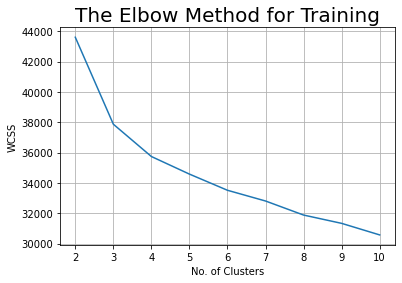

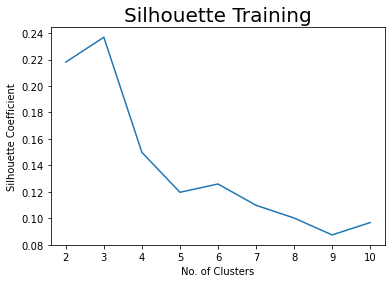

In [12]:
# K-MEANS for Training Data

wcss = []
silhouette_coefficients = []
for i in range(2, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x_scaled)
    score = silhouette_score(x_scaled,km.labels_)
    print("Clusters = "+str(i)+": Silhouette = "+str(round(score,3)))
    silhouette_coefficients.append(score)
    wcss.append(km.inertia_)
    
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method for Training', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.title('Silhouette Training', fontsize = 20)
plt.xlabel("No. of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [13]:
#Training
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x_scaled)
clusters = km.predict(x_scaled)
df = pd.concat([df.reset_index(),pd.DataFrame(clusters,columns = ['clusters']).reset_index()],axis = 1)
df.drop(['index'],axis =1, inplace = True)
print(df['clusters'].value_counts())

2    2180
1     830
0     323
Name: clusters, dtype: int64


In [15]:
cluster1 = df.loc[df['clusters'] == 0]
cluster2 = df.loc[df['clusters'] == 1]
cluster3 = df.loc[df['clusters'] == 2]

In [ ]:
cluster1

In [18]:
columns = list(cluster1.columns)
columns.remove('Churn?')
means = pd.DataFrame({'Fields': columns,'Cluster-1':list(cluster1.mean()),'Cluster-2':list(cluster2.mean()),'Cluster-3':list(cluster3.mean())})
print(means)

ValueError: list.remove(x): x not in list

In [17]:


X = df.iloc[:, 0:15]
y = df.iloc[:,-2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 22,shuffle = True)
#Decision Tree Classifier
dtclf = DecisionTreeClassifier(random_state = 12) 
dtclf = dtclf.fit(X_train,y_train)
y_pred = dtclf.predict(X_test)

print(classification_report(y_test, y_pred))

X = cluster1.iloc[:, 0:15]
y = cluster1.iloc[:,-2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 22,shuffle = True)

dtclf = DecisionTreeClassifier(random_state = 12) 
dtclf = dtclf.fit(X_train,y_train)
y_pred = dtclf.predict(X_test)
print(classification_report(y_test, y_pred))

X = cluster2.iloc[:, 0:15]
y = cluster2.iloc[:,-2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 22,shuffle = True)

dtclf = DecisionTreeClassifier(random_state = 12) 
dtclf = dtclf.fit(X_train,y_train)
y_pred = dtclf.predict(X_test)
print(classification_report(y_test, y_pred))

X = cluster3.iloc[:, 0:15]
y = cluster3.iloc[:,-2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 22,shuffle = True)

dtclf = DecisionTreeClassifier(random_state = 12) 
dtclf = dtclf.fit(X_train,y_train)
y_pred = dtclf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.19      0.18      0.18       288
           1       0.38      0.36      0.37       473
           2       0.20      0.22      0.21       306
           3       0.12      0.12      0.12       161
           4       0.08      0.11      0.09        62
           5       0.00      0.00      0.00        29
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0

    accuracy                           0.23      1334
   macro avg       0.10      0.10      0.10      1334
weighted avg       0.24      0.23      0.24      1334

              precision    recall  f1-score   support

           0       0.30      0.22      0.25        36
           1       0.27      0.33      0.30        39
           2       0.25      0.17      0.20        29
           3       0.25 

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\

ANALYSIS:

Group Classification Model:
Accuracy = 0.23

Cluster1 Accuracy = 0.26
Cluster2 Accuracy = 0.24
Cluster3 Accuracy = 0.26
Average Accuracy Segmentation = 84+199+567/3333 = 0.25
